In [1]:
import pandas as pd 
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("zomato.csv")

### Print some data to go through data, columns

In [2]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Get idea of shape of data

In [3]:
df.shape

(51717, 17)

### Get name of columns

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Remove unnecessary columns 
Columns like url, address, phone, menu_item (becuase it is just a random symbol) are not giving us any insights hence can be dropped. also change how rate is displayed to make it easier for analysing

In [5]:
#Why menu_item should be dropped. all 51717 rows have empty menu
df['menu_item']

0        []
1        []
2        []
3        []
4        []
         ..
51712    []
51713    []
51714    []
51715    []
51716    []
Name: menu_item, Length: 51717, dtype: object

In [6]:
df['reviews_list'] 
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df.drop(['url', 'phone', 'menu_item', 'address','dish_liked'], axis=1, inplace=True)

In [8]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Check if duplicates exist

In [9]:
duplicateRows = df[df.duplicated()]
len(duplicateRows)

72

### Drop duplicates

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(51645, 12)

### Check values for columns

In [11]:
df['rate'].unique()
# So I have come across null values, NEW and "-" which need to be dealt with

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Rating column has NEW, Nan and "-" which need to be dealt with

In [12]:
#Count of NEW
df['rate'].value_counts()['NEW']

2197

In [13]:
#Count of Nan
print(df.loc[:, 'rate'].isnull().sum()) 

7757


In [14]:
#Count of "-"
df['rate'].value_counts()['-']

69

In [15]:
#Check which cols have rating null and reviews_list not equal to zero. 
df[(df['rate'].isna()) & (df['reviews_list'] != "[]") ]
# If these cols exist, for that row, extract ratings from reviews_list and take average and store it in ratings column

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",Delivery,Banashankari
114,Cake Bite,No,No,NaN,0,Banashankari,Bakery,Bakery,300,"[('Rated 1.0', ""RATED\n worst service & only ...",Delivery,Banashankari
116,Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,150,"[('Rated 5.0', 'RATED\n Wow this food is grea...",Delivery,Banashankari
134,Kaumudis Juoice,No,No,NaN,0,Banashankari,"Beverage Shop, Quick Bites","Beverages, Fast Food, Juices",150,"[('Rated 5.0', ""RATED\n Excellent sandwich so...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51498,Mothi Family Restaurant,No,No,NaN,0,Whitefield,Quick Bites,"South Indian, North Indian",350,"[('Rated 4.0', 'RATED\n food was great I had ...",Dine-out,Whitefield
51599,Momo Time,Yes,No,NaN,0,Whitefield,Quick Bites,"Momos, Chinese",300,"[('Rated 1.0', 'RATED\n They are making us fo...",Dine-out,Whitefield
51626,Ghar Ke Phulke,No,No,NaN,0,"ITPL Main Road, Whitefield",Quick Bites,North Indian,300,"[('Rated 5.0', 'RATED\n Awesome food, amazing...",Dine-out,Whitefield
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",Drinks & nightlife,Whitefield


In [16]:
#Show structure of reviews_list . We can see the various ratings which we will extract and store in ratings column
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [17]:
# Also check those columns where rating = "-" and reviews_list is not empty
df[(df['rate'] == "-") & (df['reviews_list'] != "[]") ]
# These values can also be filled by extracting data from reviews_list and averaging it out and filling it

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
3069,Super Chef's (New Royal treat),No,No,-,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",Delivery,Basavanagudi
3378,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,"[('Rated 5.0', 'RATED\n Food was delicious es...",Dine-out,Basavanagudi
3396,Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",Dine-out,Basavanagudi
3409,Oasis Food Center,No,No,-,0,Basavanagudi,Quick Bites,Fast Food,150,"[('Rated 4.0', 'RATED\n One stop shop for che...",Dine-out,Basavanagudi
3410,Hotel Trupthi,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Chinese, North Indian",200,"[('Rated 5.0', 'RATED\n One of the best Cante...",Dine-out,Basavanagudi
3431,Brahmin Tiffins & Coffee,No,No,-,0,Basavanagudi,Quick Bites,"South Indian, Beverages",100,"[('Rated 5.0', 'RATED\n Best place to have id...",Dine-out,Basavanagudi
15959,Village Kitchen,Yes,No,-,0,HSR,Quick Bites,"South Indian, Kerala, Chinese",250,"[('Rated 1.0', 'RATED\n I was not expecting t...",Delivery,HSR
18602,Cake N Cream,No,No,-,0,Jeevan Bhima Nagar,Bakery,"Bakery, Desserts",360,"[('Rated 3.0', ""RATED\n Got this cake in thip...",Desserts,Indiranagar
33403,Al-Hyatt,No,No,-,0,Ejipura,Quick Bites,"Biryani, Chinese",300,"[('Rated 3.0', ""RATED\n Decent road side food...",Delivery,Koramangala 6th Block
33404,Sugary Bakers - A Boutique Bakery,No,No,-,0,Koramangala 3rd Block,Bakery,"Bakery, Desserts",200,"[('Rated 5.0', 'RATED\n Truly a boutique bake...",Delivery,Koramangala 6th Block


In [18]:
#Check if there are any rows where review_results is not empty and restaurant is new (if yes, then the reviews can be used to fill the rating column)
df[(df['reviews_list'] != "[]") & (df['rate'] == "NEW")]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",Delivery,Banashankari
110,Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",Delivery,Banashankari
154,Bitez,No,No,NEW,0,Banashankari,Quick Bites,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",Delivery,Banashankari
455,The Sip Shop,Yes,No,NEW,0,Basavanagudi,Quick Bites,"Pizza, Beverages, Ice Cream",200,"[('Rated 5.0', 'RATED\n Good food great taste...",Delivery,Banashankari
463,Hyderabad Express,Yes,No,NEW,0,Banashankari,Quick Bites,"Hyderabadi, Biryani, South Indian, Andhra, Bev...",300,"[('Rated 1.0', 'RATED\n I have never seen suc...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51393,Picnik,Yes,No,NEW,0,Whitefield,Quick Bites,"North Indian, Street Food, Beverages",300,"[('Rated 5.0', 'RATED\n Nice place for tasty ...",Dine-out,Whitefield
51500,On The Go,No,No,NEW,0,Whitefield,Quick Bites,"North Indian, Mughlai, Chinese",400,"[('Rated 5.0', 'RATED\n Super tasty food. Val...",Dine-out,Whitefield
51586,Quick Bites,Yes,No,NEW,0,Whitefield,Quick Bites,Chinese,200,"[('Rated 5.0', 'RATED\n This is an awesome pl...",Dine-out,Whitefield
51603,Shiv sagar,Yes,No,NEW,0,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250,"[('Rated 3.0', 'RATED\n A highly expensive pl...",Dine-out,Whitefield


### Drop columns according to given conditions

In [19]:
#df.drop(((df['rate'] == "NEW")  &  (df['reviews_list'] == "[]")), axis=0, inplace=True)
df1 = df[(df['rate'] == "NEW") & (df['reviews_list'] == "[]")]
df1.shape

df2 = df[(df['rate'].isna()) & (df['reviews_list'] == "[]")]
df2.shape

df3 = df[(df['rate'] == "-") & (df['reviews_list'] == "[]")]
df3.shape

print(f'Total number of rows to be removed from original dataframe :{len(df1) + len(df2) + len(df3)}')


# Combine these dataframes to be removed into one dataframe and remove it from our main dataframe
df_rem = pd.concat([df1,df2,df3], axis = 0, ignore_index = True)
print(f'Combined dataframe rows : {len(df_rem)}')
#df_rem.head()

Total number of rows to be removed from original dataframe :6455
Combined dataframe rows : 6455


### Drop the unneeded rows calculated above

In [20]:
df = pd.concat([df, df_rem, df_rem]).drop_duplicates(keep=False) # this line is basically df = df - df_rem
print(df.shape)
# This is 51645 - 6455

(45190, 12)


### Now that columns have been dropped, fill the other columns with ratings

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### Testing how regex works in string

In [22]:
s = df['reviews_list'][1]
#s
l1 = re.findall(r"'Rated (\d.\d)",s)
l1 = list(map(float, l1))
l1

[4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0]

In [23]:
df_trouble = df[(df['rate'] == "NEW") | (df['rate'] == "-")]
df_trouble.shape

(1072, 12)

In [24]:
temp = df[df['rate'].isna()]
temp.shape

(2496, 12)

### These are the rows whose rating needs to be filled

In [25]:
df_ratings_filled = pd.concat([df_trouble, temp], axis=0, ignore_index=True)
df_ratings_filled.shape
df_ratings_filled.rate.unique()

array(['NEW', '-', nan], dtype=object)

In [26]:
empty_l = [] # for rating values in review_list
empty_l_2 = [] # for count of votes in reviews_list
for row in df_ratings_filled.itertuples(): # also tried to use normal for i in range(len(df_ratings)) but 
    s = row.reviews_list
    l1 = re.findall(r"Rated (\d.\d)",s)
    l1 = [float(i) for i in l1]
    empty_l_2.append(len(l1))
    avg = (sum(l1))/ (len(l1))
    empty_l.append(avg)
df_ratings_filled['rate'] = np.resize(empty_l,len(df_ratings_filled))
df_ratings_filled['votes'] = np.resize(empty_l_2,len(df_ratings_filled))
df_ratings_filled.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Spicy Tandoor,No,No,4.5,2,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",Delivery,Banashankari
1,Hari Super Sandwich,No,No,1.0,2,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",Delivery,Banashankari
2,Bitez,No,No,1.0,1,Banashankari,Quick Bites,Fast Food,100,"[('Rated 1.0', ""RATED\n Not a good place. Ove...",Delivery,Banashankari
3,The Sip Shop,Yes,No,5.0,1,Basavanagudi,Quick Bites,"Pizza, Beverages, Ice Cream",200,"[('Rated 5.0', 'RATED\n Good food great taste...",Delivery,Banashankari
4,Hyderabad Express,Yes,No,4.5,8,Banashankari,Quick Bites,"Hyderabadi, Biryani, South Indian, Andhra, Bev...",300,"[('Rated 1.0', 'RATED\n I have never seen suc...",Delivery,Banashankari


### Now to join our dataframes(df_ratings filled and df) for correct dataframe

In [27]:
#Remove those rate having NEW, "-" or nan
temp = df[(df['rate'] != "NEW") & (df['rate'] != "-") & (df['rate'].isnull() ==False)].copy()
temp['rate'] = temp['rate'].str.replace("/5", "")
df_final = pd.concat([temp,df_ratings_filled],axis=0, ignore_index=True)
print(df_final['rate'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' '2.9' '3.5' '2.6' '3.8 ' '3.4' '4.5' '2.5' '2.7' '4.7'
 '2.4' '2.2' '2.3' '3.4 ' '3.6 ' '4.8' '3.9 ' '4.2 ' '4.0 ' '4.1 ' '3.7 '
 '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 ' '3.2 ' '2.6 ' '4.5 '
 '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 ' '3.0 ' '4.8 ' '2.3 '
 '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ' 4.5 1.0 5.0 4.0
 4.333333333333333 3.0 4.75 3.5 4.454545454545454 4.2 4.4
 3.7142857142857144 2.6 4.833333333333333 4.444444444444445
 3.6666666666666665 4.016666666666667 4.254545454545455 4.155172413793103
 3.981818181818182 3.9166666666666665 4.625 3.75 4.666666666666667 2.0 2.5
 2.75 4.857142857142857 3.4 3.3333333333333335 4.9 4.166666666666667
 3.8333333333333335 3.8 2.3333333333333335 3.878787878787879
 3.9390243902439024 4.523809523809524 4.306273062730627 3.8990536277602525
 2.6666666666666665 1.1666666666666667 1.631578947368421
 1.9473684210526316 1.7272727272727273 3.2 3.3

### Round of column values

In [28]:
df_final['rate'] = df_final['rate'].astype(float)
df_final['rate'] = df_final['rate'].round(decimals=1)
df_final['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8, 1. , 5. , 1.2, 1.6, 1.9, 1.7, 1.3, 1.5,
       1.4])

In [29]:
df_final.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### Checking other column

In [30]:
df_final['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', nan,
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80', '560', '360',
       '60'], dtype=object)

### Removing commas from each value

In [31]:
df_final['approx_cost(for two people)'] = df_final['approx_cost(for two people)'].str.replace(",","")
df_final['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '1700', '1350', '2200', '1400', '2000', '1800', nan, '1900', '180',
       '330', '2500', '2100', '3000', '2800', '3400', '50', '40', '1250',
       '3500', '4000', '2400', '2600', '1450', '70', '3200', '240',
       '6000', '1050', '2300', '4100', '120', '5000', '3700', '1650',
       '2700', '4500', '80', '560', '360', '60'], dtype=object)

In [32]:
#Convert that column to float
#df_final['approx_cost(for two people)'] = df_final['approx_cost(for two people)'].astype(int)
#df_final['approx_cost(for two people)'].unique()
#df_final.shape
#df_final['approx_cost(for two people)'].isnull().sum()

In [33]:
df_final['rest_type'].isnull().sum()

160

In [34]:
df_final['rest_type'] = df_final['rest_type'].fillna("other")

In [35]:
df_final['rest_type'].value_counts()['other']

160

### Fill approx cost for each 

In [36]:
df_final['approx_cost(for two people)'].isnull().sum()

297

In [37]:
df_final.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [38]:
# What our approach will be is that caluclate avg cost of restaurants in that area and fill in there. 

In [39]:
type(df['approx_cost(for two people)'][0])
#temp.head()
# so it is string and must be typecasted to float

str

In [40]:
df_final['approx_cost(for two people)'] = df_final['approx_cost(for two people)'].astype(float)

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


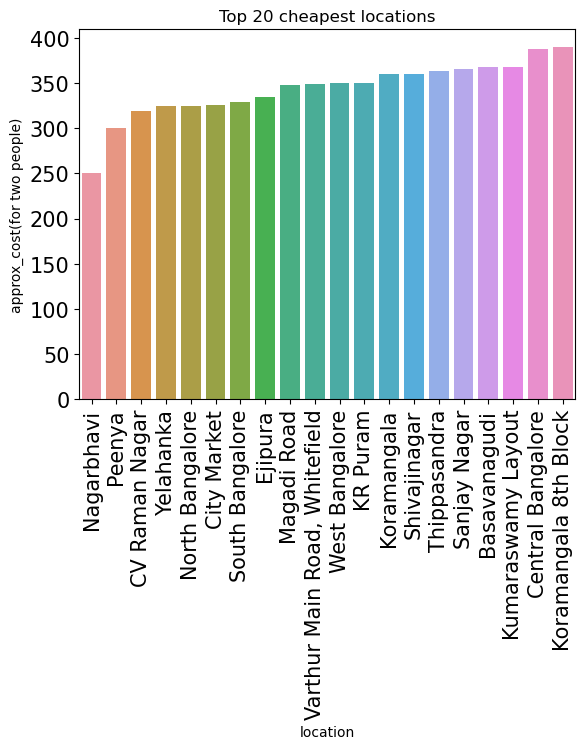

In [41]:
temp = df_final.groupby('location')['approx_cost(for two people)'].mean().reset_index()
temp.sort_values(by = "approx_cost(for two people)", inplace=True, ascending= True)
sns.barplot(temp['location'].iloc[0:20], temp['approx_cost(for two people)'].iloc[0:20])
plt.xticks(rotation = 90)
plt.title("Top 20 cheapest locations")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


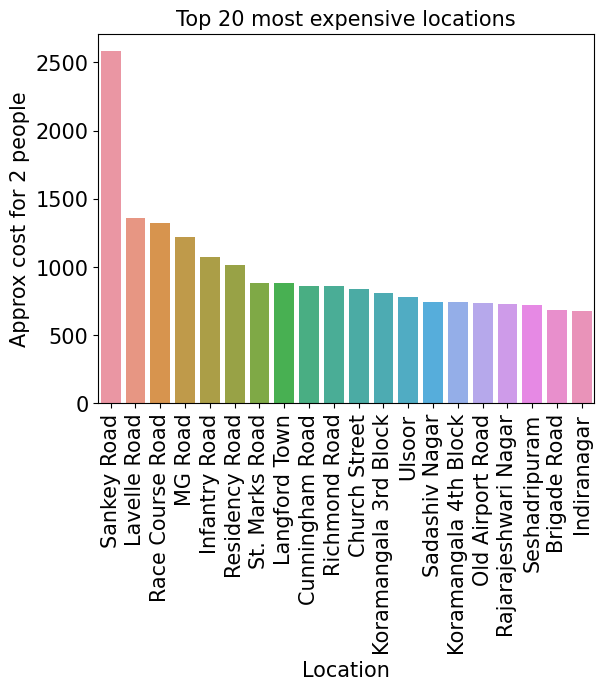

In [42]:
temp = df_final.groupby('location')['approx_cost(for two people)'].mean().reset_index()
temp.sort_values(by = "approx_cost(for two people)", inplace=True, ascending= False)
sns.barplot(temp['location'].iloc[0:20], temp['approx_cost(for two people)'].iloc[0:20])
plt.xticks(rotation = 90)
plt.title("Top 20 most expensive locations", size = 15)
plt.xlabel("Location", size = 15)
plt.ylabel("Approx cost for 2 people", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [43]:
df_final['approx_cost(for two people)'].isnull().sum()

297

In [44]:
df_final.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [45]:
df_final.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        17
approx_cost(for two people)    297
reviews_list                     0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [46]:
df_final['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'Biryani, Rolls, Middle Eastern, Arabian',
       'North Indian, Chinese, Biryani, Street Food',
       'North Indian, South Indian, Chinese, Desserts'], dtype=object)

In [47]:
df_final['cuisines'] = df_final['cuisines'].fillna("other")

### Moving to visualisation

In [48]:
#Count plot of various locations
temp = df_final.groupby('location').rate.count() # right now using rate column as buffer store
temp = temp.reset_index()
temp.rename(columns={'rate' : 'count'}, inplace=True)
temp = temp.sort_values(by = 'count', ascending=False)
#temp['location'].unique

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


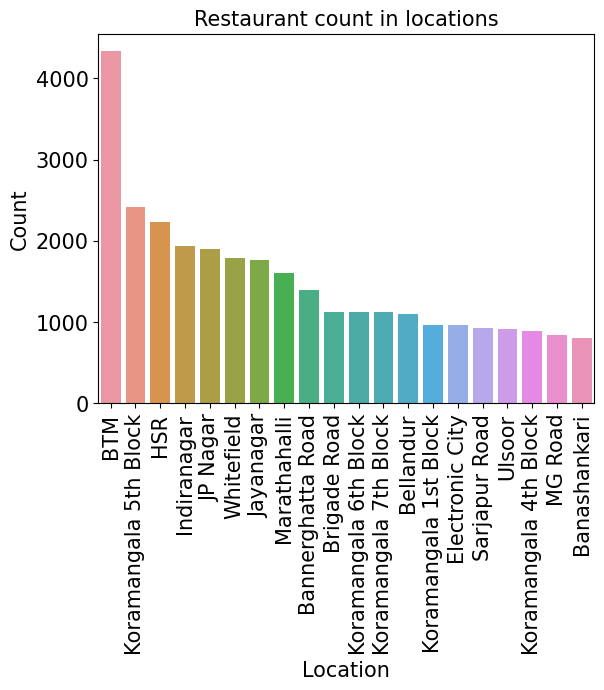

In [49]:

sns.barplot(temp['location'].iloc[0:20], temp['count'].iloc[0:20])
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.xlabel("Location", size = 15)
plt.ylabel("Count", size = 15)
plt.title("Restaurant count in locations", size = 15)
plt.show()

### Count of online order

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


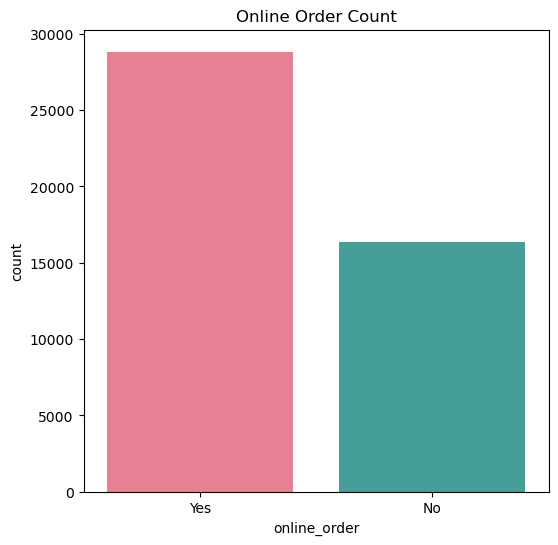

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(df_final['online_order'], palette="husl")
plt.title("Online Order Count")
plt.show()

### Count of book facility and not

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


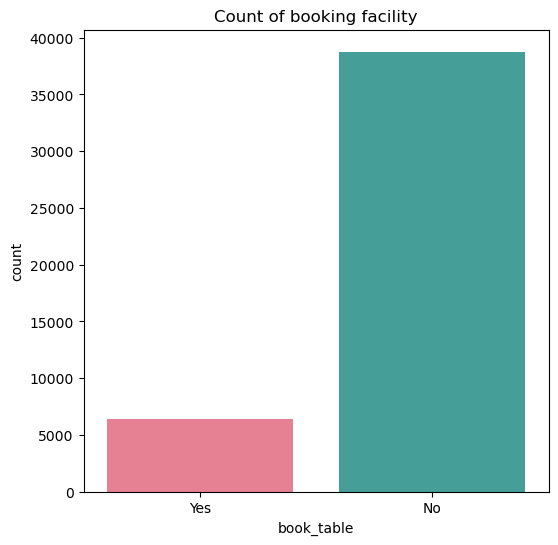

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(df_final['book_table'], palette="husl")
plt.title("Count of booking facility")
plt.show()

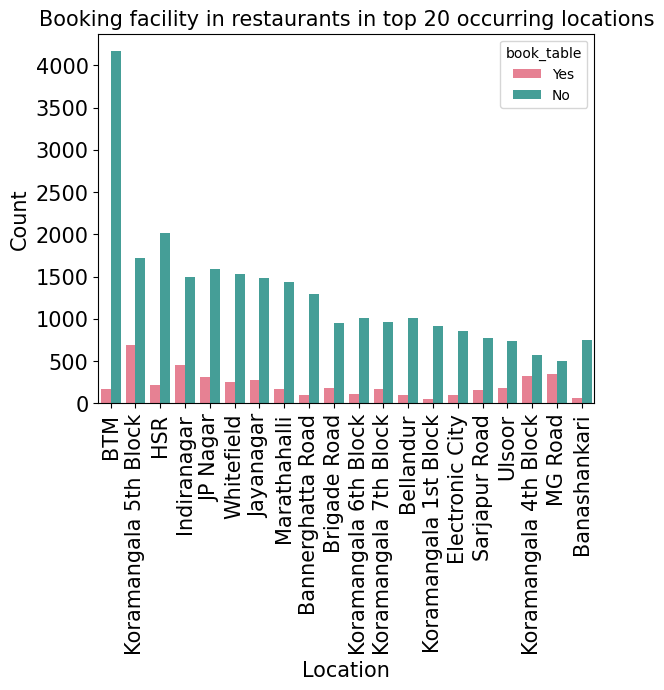

In [52]:
sns.countplot(data=df_final,x='location',hue = 'book_table',  order=df_final.location.value_counts().iloc[:20].index, palette="husl")
plt.xticks(rotation = 90, size = 15)
plt.yticks(size=15)
plt.xlabel("Location", size = 15)
plt.ylabel("Count", size = 15)
plt.title("Booking facility in restaurants in top 20 occurring locations", size = 15)
plt.show()

<AxesSubplot:>

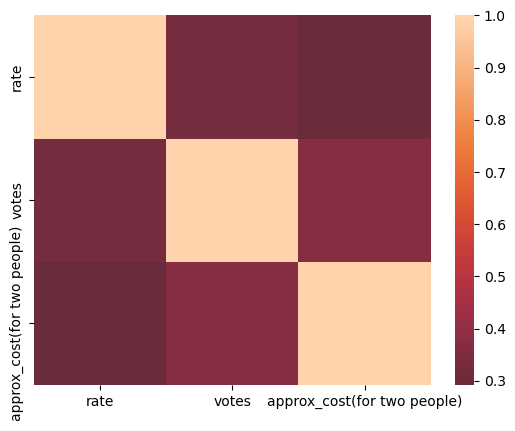

In [53]:
sns.heatmap(df_final.corr(), center=0)

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


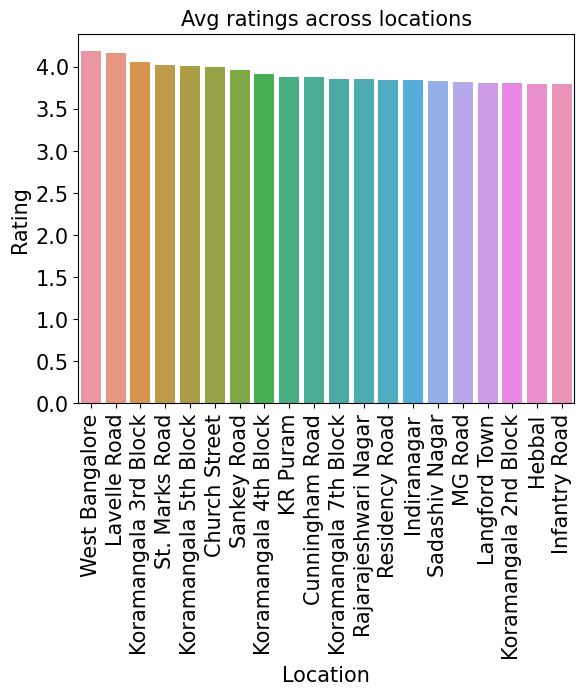

In [54]:
temp_df = df_final.groupby(['location']).rate.mean().reset_index()
temp_df.sort_values(by = "rate", inplace=True, ascending=False)
temp_df
plt.ticklabel_format(style='plain') # to remove le6
sns.barplot(temp_df['location'].iloc[0:20],temp_df['rate'].iloc[0:20])
#temp_df.plot(kind='bar', title='Rate per location', ylabel='Rate', xlabel='Location', figsize=(90, 20))
plt.xticks(rotation = 90, size=15)
plt.yticks(size = 15)
plt.xlabel("Location", size = 15)
plt.ylabel("Rating", size = 15)
plt.title("Avg ratings across locations", size = 15)
plt.show()

#temp_df

# so not much difference between average ratings

In [55]:
# No of votes location wise
temp = df_final.groupby(['location']).votes.sum().reset_index()
temp.sort_values(by = "votes", inplace= True, ascending=False)
temp.head(20)

,location,votes
44,Koramangala 5th Block,2220064
27,Indiranagar,1195677
43,Koramangala 4th Block,685255
0,BTM,618379
12,Church Street,594940
29,JP Nagar,580104
50,Lavelle Road,503882
22,HSR,500364
46,Koramangala 7th Block,495548
31,Jayanagar,482015


C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


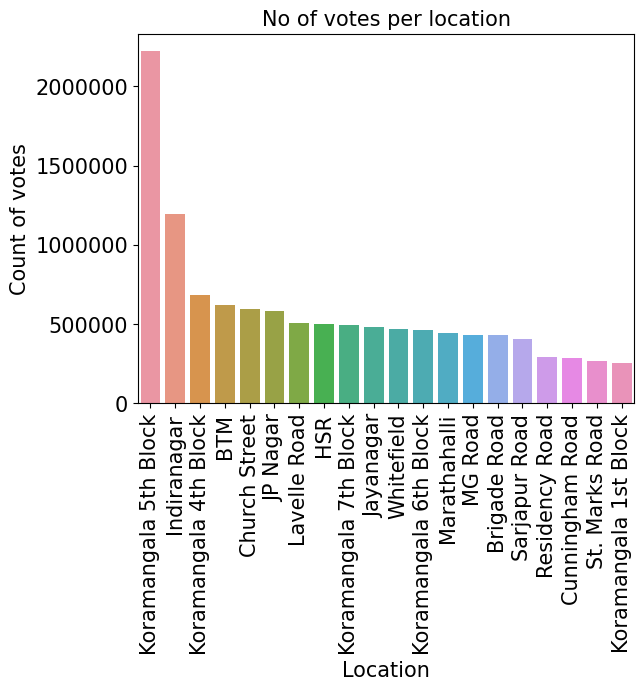

In [56]:
plt.ticklabel_format(style='plain') # to remove le6
sns.barplot(temp['location'].iloc[0:20], temp['votes'].iloc[0:20])
plt.title("No of votes per location", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.xlabel("Location",size = 15)
plt.ylabel("Count of votes", size = 15)
plt.show()

### Check overall ratings around bangalore

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


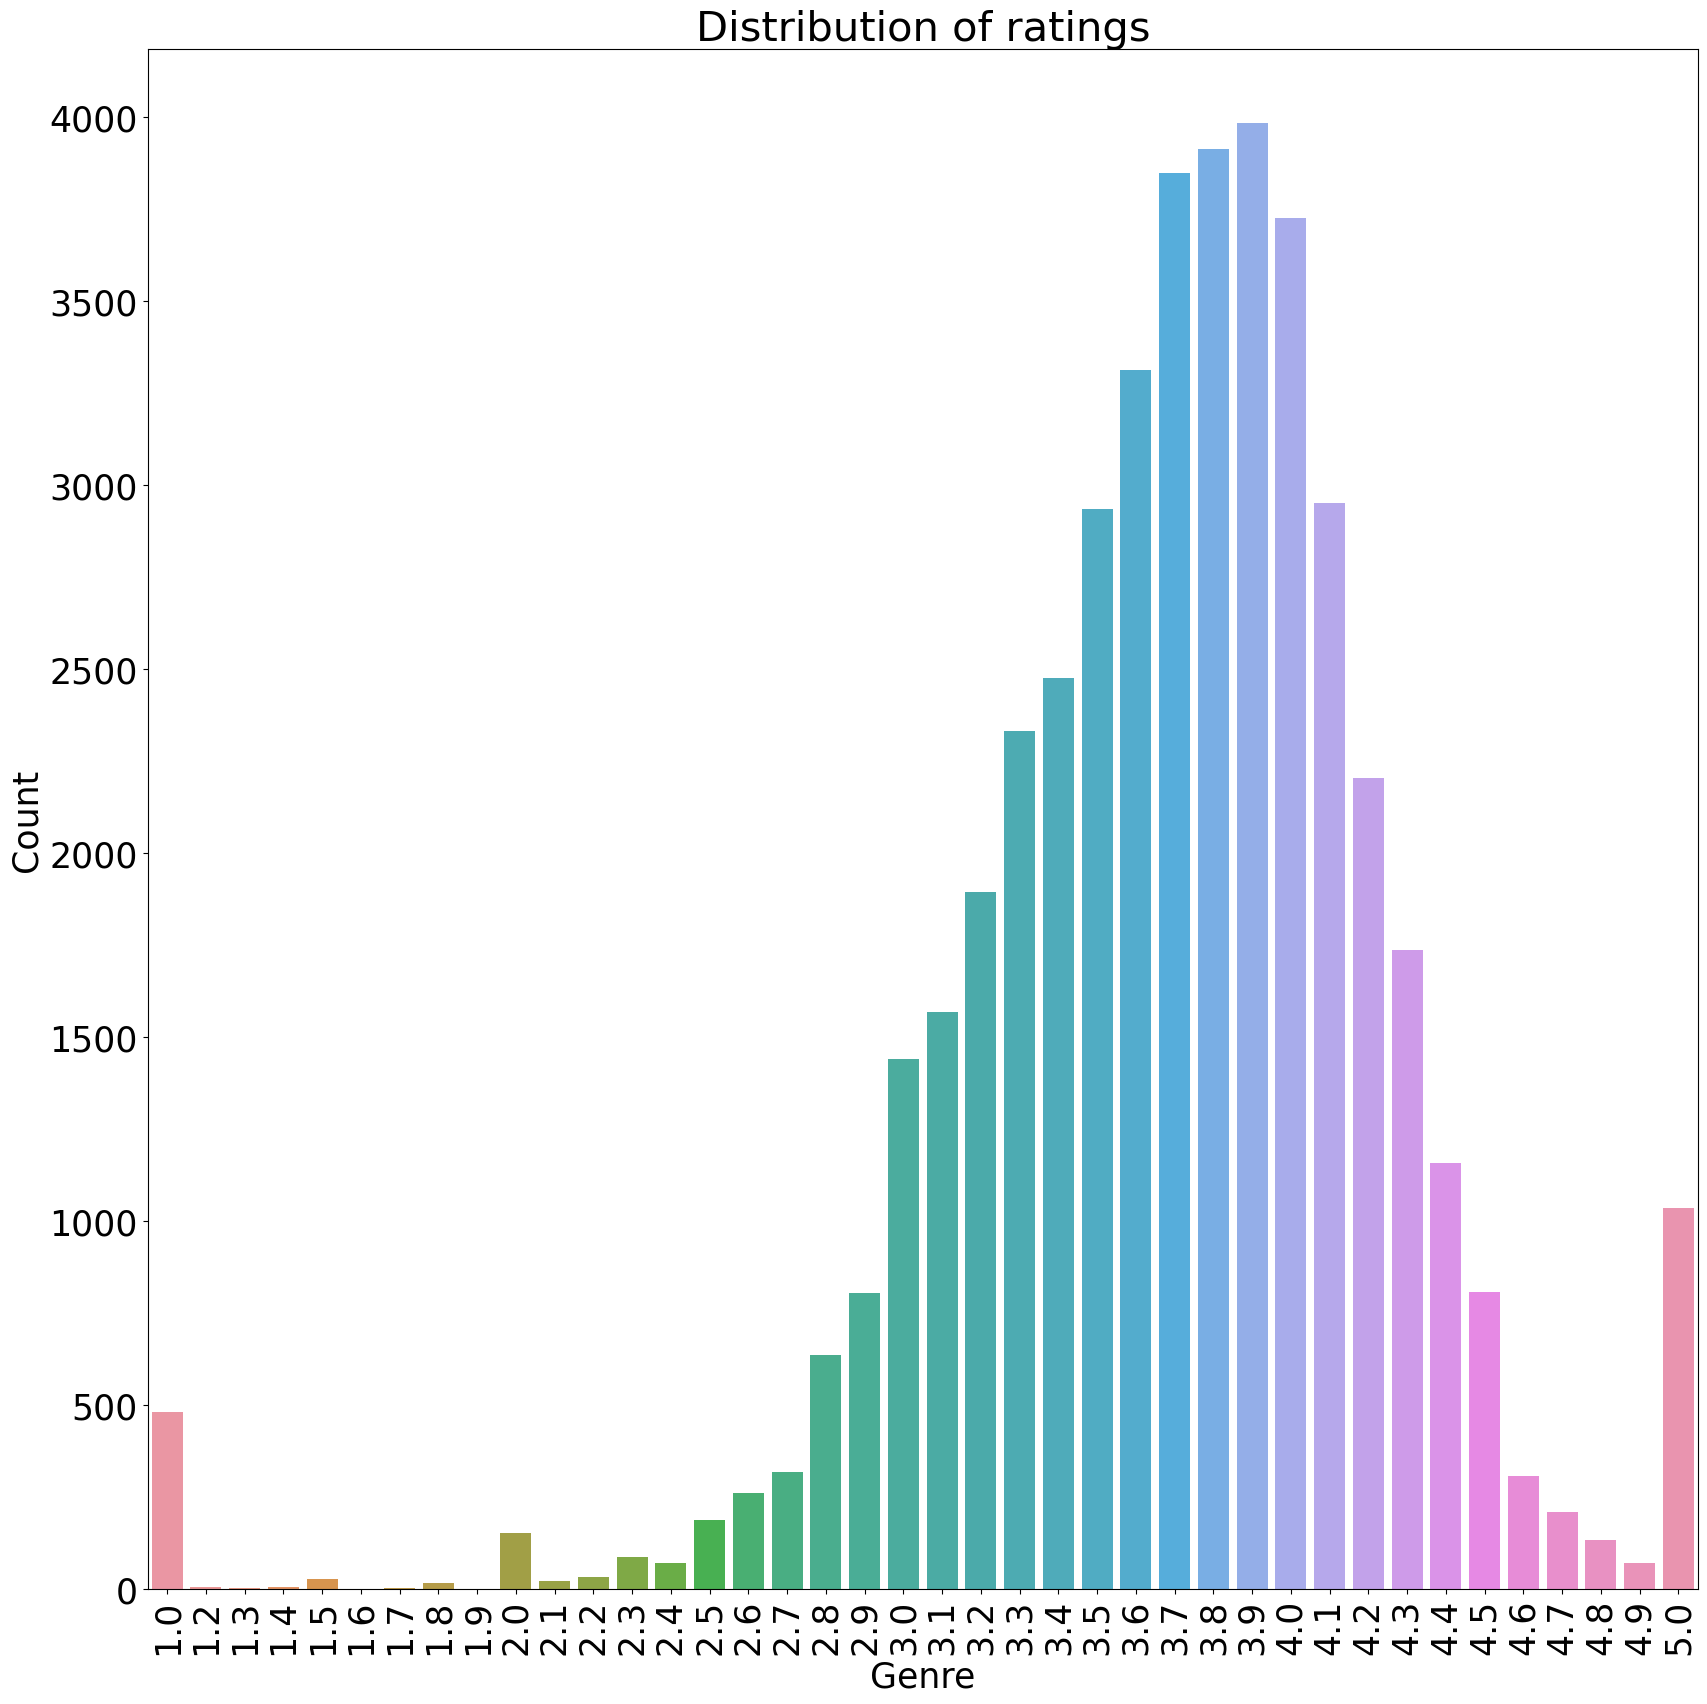

<Figure size 4000x4000 with 0 Axes>

In [57]:
import matplotlib as mpl
plt.figure(figsize=(20,20))
sns.countplot(df_final['rate'])
plt.title("Distribution of ratings", size = 30)
plt.xlabel("Genre", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 25)
plt.yticks(size=25)
plt.figure(figsize=(40,40))
plt.show()

### Find location of 5 star ratings which can be outlier

In [58]:
checker = df_final[df_final['rate'] == 5.0]
checker = checker.groupby(['location']).rate.count().reset_index()
checker.sort_values(by = "rate", inplace = True, ascending=False)
checker.head(30) 
# So most come from BTM so no of people putting vote there are less and they give higher vote
# 1 star data also shown below

,location,rate
0,BTM,160
32,Koramangala 1st Block,72
24,JP Nagar,62
59,Whitefield,61
3,Bannerghatta Road,53
19,HSR,42
26,Jayanagar,39
43,Marathahalli,35
54,Shivajinagar,35
36,Koramangala 5th Block,28


C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


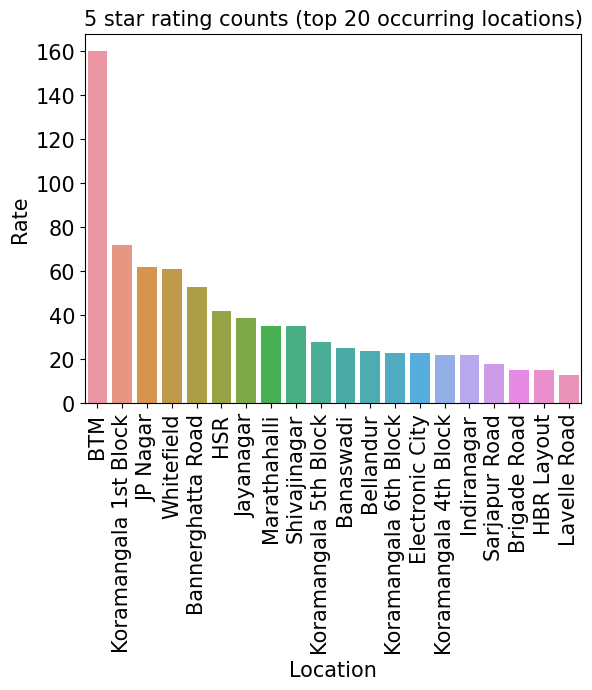

In [59]:
sns.barplot(checker['location'].iloc[0:20], checker['rate'].iloc[0:20])
plt.xticks(rotation = 90, size = 15)
plt.title("5 star rating counts (top 20 occurring locations)", size = 15)
plt.yticks(size = 15)
plt.xlabel("Location", size = 15)
plt.ylabel("Rate", size = 15)
plt.show()

In [60]:
# Even analyse for 1 star ratings
checker = df_final[df_final['rate'] == 1.0]
checker = checker.groupby(['location']).rate.count().reset_index()
checker.sort_values(by = "rate", inplace=True, ascending=False)
checker.reset_index(inplace= True)

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


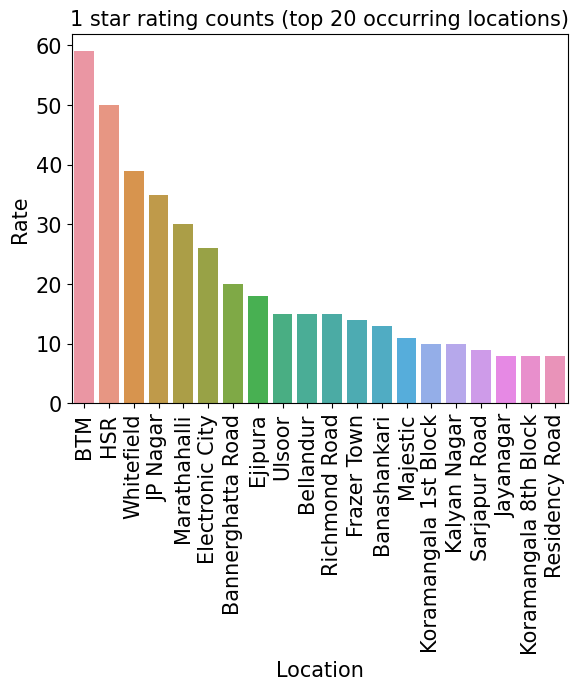

In [61]:
#checker.iloc[0:10].plot(kind='bar', title='Outlier per location', ylabel='count of 5 star', xlabel='Location', figsize=(90, 20))
sns.barplot(checker['location'].iloc[0:20], checker['rate'].iloc[0:20])
plt.xticks(rotation = 90, size = 15)
plt.title("1 star rating counts (top 20 occurring locations)", size = 15)
plt.yticks(size = 15)
plt.xlabel("Location", size = 15)
plt.ylabel("Rate", size = 15)
plt.show()

In [62]:
# Approx cost for each location in bangalore
cost = df_final.groupby(['location'])['approx_cost(for two people)'].mean()

In [63]:
#Check why Sankey road restaurants cost is so high
checker = (df_final[df_final['location'] == "Sankey Road"])
checker_sub = checker['listed_in(type)'].value_counts().reset_index()
checker_sub.rename(columns={'index':'Type', 'listed_in(type)' : 'count'}, inplace = True)
checker_sub

,Type,count
0,Dine-out,16
1,Buffet,5
2,Drinks & nightlife,2
3,Delivery,1
4,Desserts,1
5,Pubs and bars,1


C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


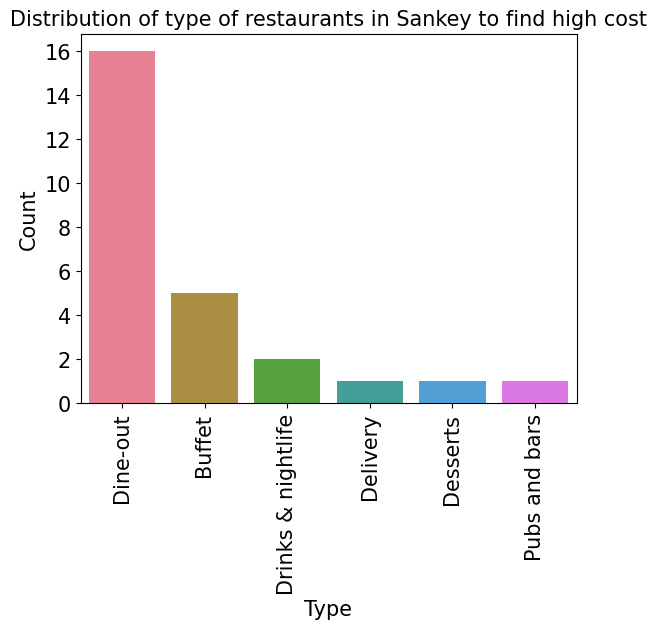

In [64]:
sns.barplot(checker_sub['Type'], checker_sub['count'], palette="husl")
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.xlabel("Type", size = 15)
plt.ylabel("Count", size = 15)
plt.title("Distribution of type of restaurants in Sankey to find high cost", size = 15)
plt.show()

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


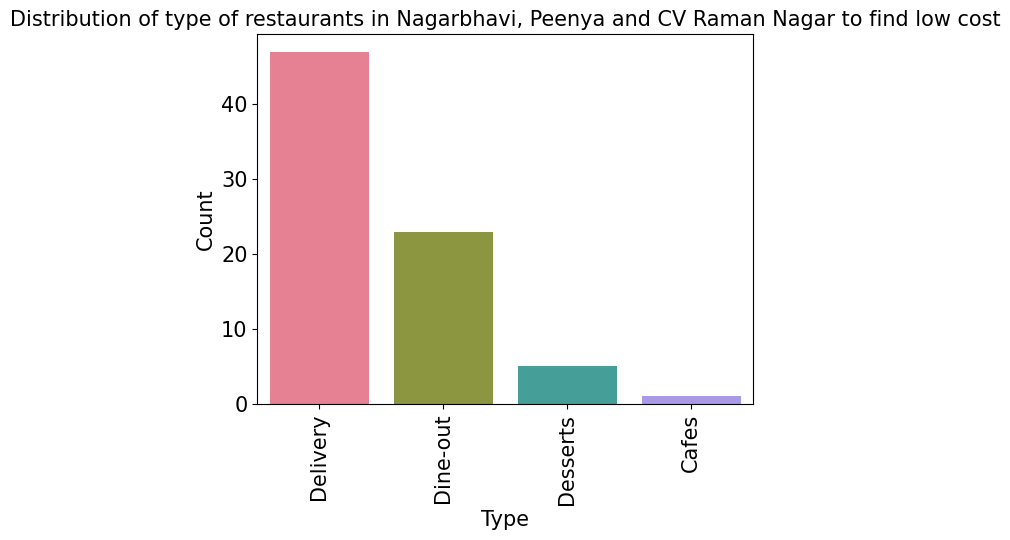

In [65]:
#Check why nagarbhavi, peenya and cv raman  restaurants cost is low
l1 = ["Nagarbhavi", "Peenya", "CV Raman Nagar"]
checker = df_final[(df_final['location'] == "Nagarbhavi") | (df_final['location'] == "Peenya") | (df_final['location'] == "CV Raman Nagar")]
checker_sub = checker['listed_in(type)'].value_counts().reset_index()
checker_sub.rename(columns={'index':'Type', 'listed_in(type)' : 'count'}, inplace = True)

sns.barplot(checker_sub['Type'], checker_sub['count'], palette="husl")
plt.xticks(rotation = 90, size = 15)
plt.xlabel("Type", size = 15)
plt.ylabel("Count", size= 15)
plt.yticks(size = 15)
plt.title("Distribution of type of restaurants in Nagarbhavi, Peenya and CV Raman Nagar to find low cost", size = 15)
plt.show()

In [66]:
#Checking which location has offline count vs online count more
df1 = df_final.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

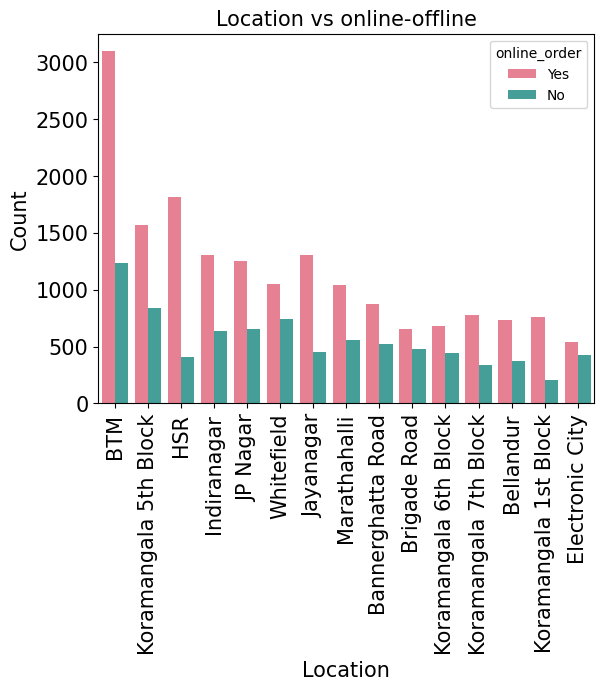

In [67]:
sns.countplot(data=df_final, x = 'location', hue='online_order', order= df_final.location.value_counts().iloc[:15].index, dodge= True, palette="husl")
plt.xlabel("Location", size = 15)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.ylabel("Count", size = 15)
plt.title("Location vs online-offline", size = 15)
plt.show()

In [68]:
checks = df_final[df_final['location'] == "BTM"]
#checks.groupby(['name']).votes.count()
checks

# basically we can see that there are many restaurants which have very less votes and upon that they are given rating
#that is why such values of 1 star and 5 star are more from BTM.

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
743,Sankranthi Veg Restaurant,Yes,No,3.0,102,BTM,Casual Dining,"South Indian, North Indian, Chinese",600.0,"[('Rated 3.0', ""RATED\n So we ended up here o...",Buffet,Bannerghatta Road
777,Hearts Unlock Cafe,No,No,3.2,11,BTM,Cafe,"Cafe, Healthy Food",500.0,"[('Rated 2.5', 'RATED\n Nice place for hookah...",Cafes,Bannerghatta Road
778,eat.fit,Yes,No,4.5,1178,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...",Delivery,Bannerghatta Road
779,Sai Abhiruchi,Yes,No,3.7,335,BTM,Casual Dining,"Andhra, North Indian, Biryani",800.0,"[('Rated 4.0', 'RATED\n Ordered boneless chic...",Delivery,Bannerghatta Road
780,Capsicum Family Restaurant,Yes,No,3.8,254,BTM,Casual Dining,"Biryani, North Indian",800.0,"[('Rated 5.0', 'RATED\n The best biryani plac...",Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...
44513,Green Mango Restaurant,No,No,1.0,1,BTM,Quick Bites,"Kerala, South Indian",300.0,"[('Rated 1.0', 'RATED\n -Quick service. Keral...",Dine-out,Koramangala 7th Block
44514,Royal's Biryani,Yes,No,4.0,1,BTM,Quick Bites,Biryani,300.0,"[('Rated 4.0', 'RATED\n An amazing biryani pl...",Dine-out,Koramangala 7th Block
44515,Deepam Tiffins,No,No,4.0,4,BTM,Quick Bites,"South Indian, North Indian, Chinese",300.0,"[('Rated 5.0', 'RATED\n \nGood'), ('Rated 5.0'...",Dine-out,Koramangala 7th Block
44517,Tit Bits,No,No,1.0,1,BTM,Quick Bites,"North Indian, Fast Food",400.0,"[('Rated 1.0', ""RATED\n I didn't receive the ...",Dine-out,Koramangala 7th Block


In [69]:
df_final["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

### Checking rating wrt to Type of restaurant

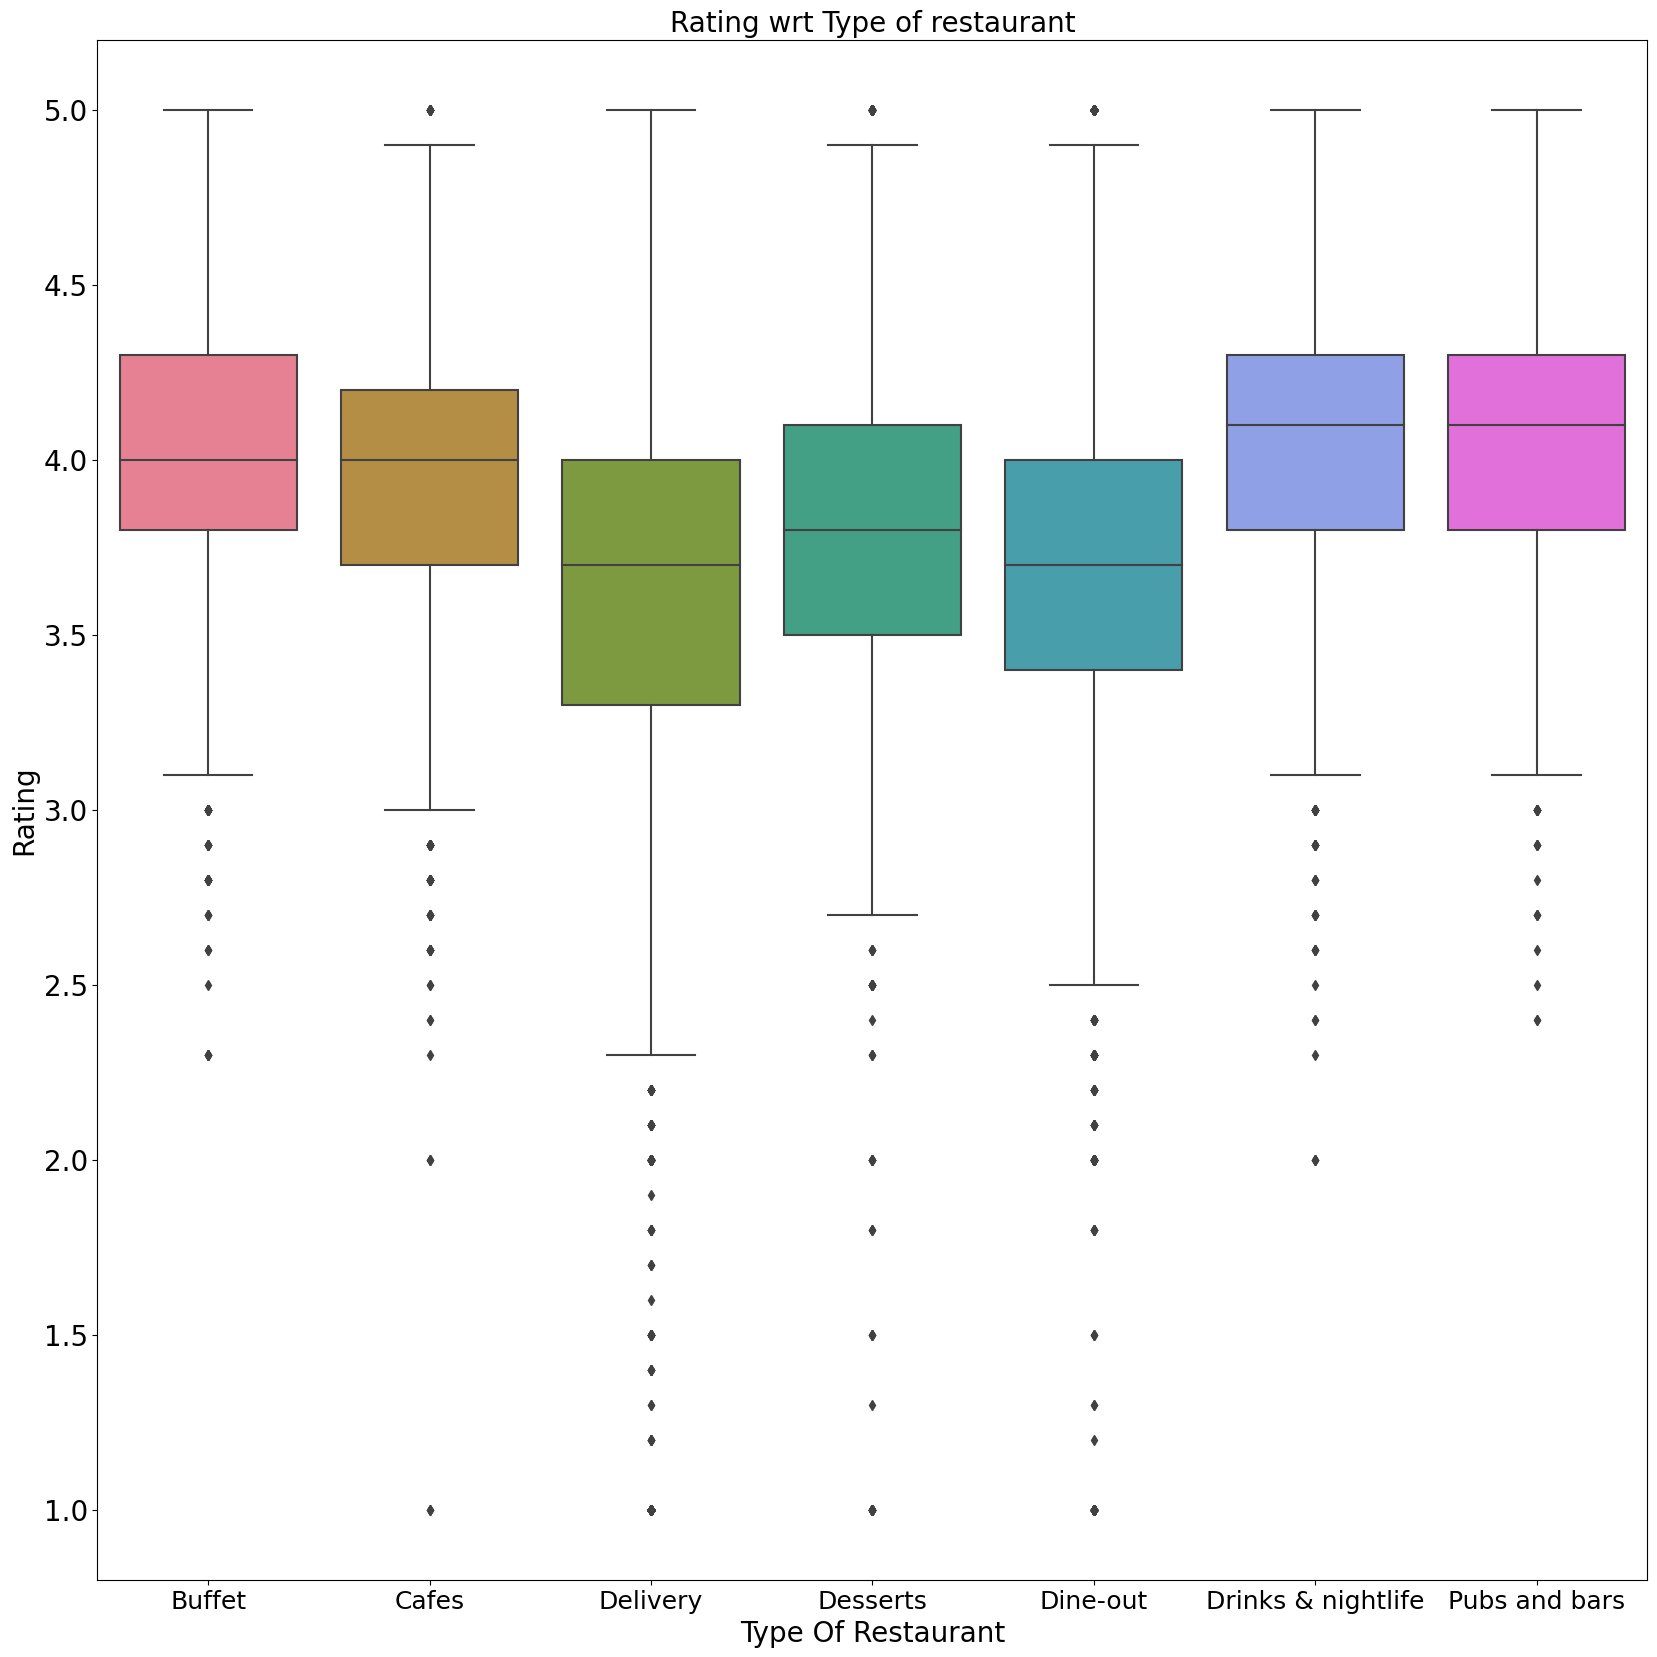

In [70]:
plt.figure(figsize=(20,20))
plt.title("Rating wrt Type of restaurant", size = 20)
sns.boxplot(x = "listed_in(type)" , y = "rate", data = df_final, palette="husl")
plt.xticks(size = 18)
plt.yticks(size = 20)
plt.xlabel("Type Of Restaurant", size = 20)
plt.ylabel("Rating", size = 20)
plt.show()

In [71]:
df_temp = df_final.groupby(['location','listed_in(type)'])['name'].count()
df_temp.to_csv('location_Type.csv')
df_temp = pd.read_csv('location_Type.csv')
df_temp = pd.pivot_table(df_temp, values=None, index=['location'], columns=['listed_in(type)'], fill_value=0, aggfunc=np.sum)
#df_temp.plot(kind = 'bar', figsize = (50,20)) # already plotted a cleaner version of this below

In [72]:
df_temp

name                                                      \
listed_in(type)   Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                   25    72     2710      142     1352                 19   
Banashankari           7    36      377       60      313                 14   
Banaswadi              0    20      263       29      219                  6   
Bannerghatta Road      9    45      727      104      502                  9   
Basavanagudi           7    11      320       57      232                  5   
...                  ...   ...      ...      ...      ...                ...   
West Bangalore         0     0        5        0        1                  0   
Whitefield            26    50      860      109      665                 47   
Wilson Garden          3     0      109        6       71                  2   
Yelahanka              0     0        3        0        2                  0   
Yeshwantpur            1     0       86        3       21                  1   

                                 
listed_in(type)   Pubs and bars  
location                         
BTM                          13  
Banashankari                  0  
Banaswadi                     1  
Bannerghatta Road             2  
Basavanagudi                  0  
...                         ...  
West Bangalore                0  
Whitefield                   31  
Wilson Garden                 1  
Yelahanka                     0  
Yeshwantpur                   1  

[92 rows x 7 columns]

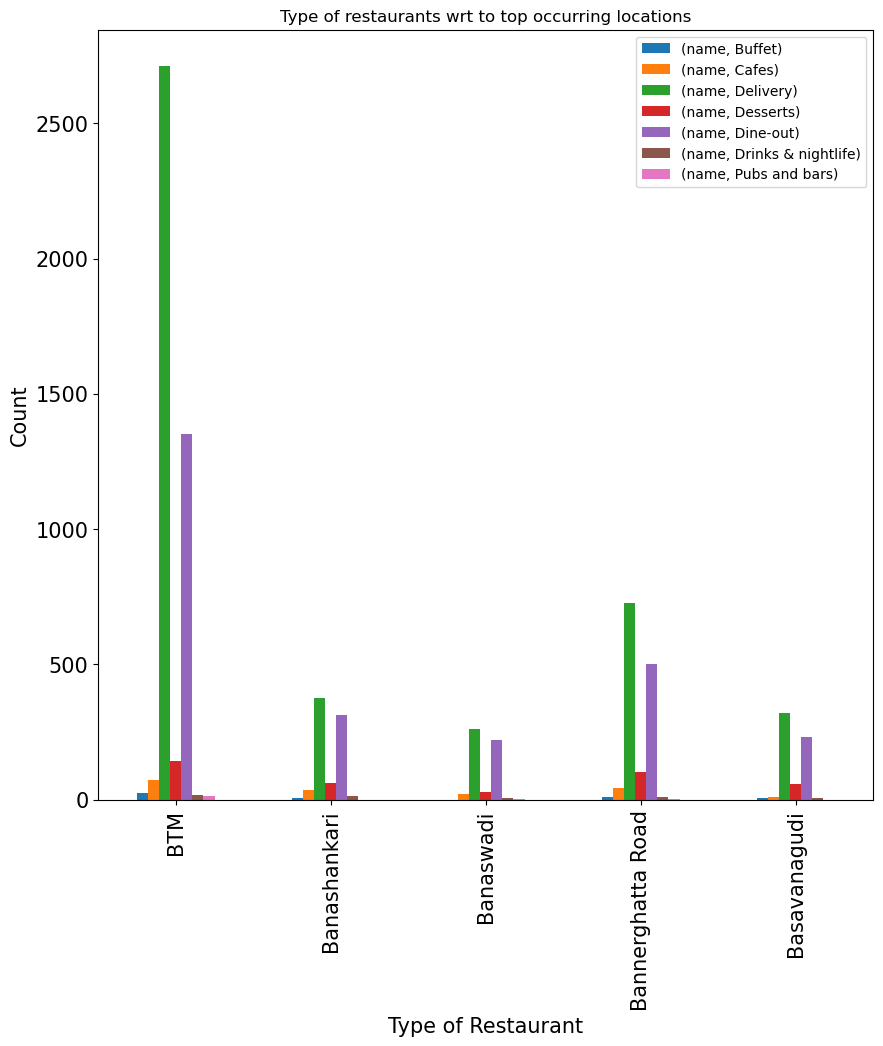

In [73]:
df_temp.iloc[0:5].plot(kind = 'bar', figsize = (10,10), label  ="")
#sns.barplot(df_temp[0:5], x = "location", hue="listed_in(type)", palette="husl")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Type of restaurants wrt to top occurring locations")
plt.xlabel("Type of Restaurant", size = 15)
plt.ylabel("Count",size=15)
plt.legend()
plt.show()

### No of votes location wise

In [74]:
df_temp = df_final[['location', 'votes']]
df_temp = df_temp.groupby(['location'])['votes'].sum()
df_temp = df_temp.to_frame()
df_temp = df_temp.sort_values('votes', ascending=False)
df_temp.head()

,votes
location,
Koramangala 5th Block,2220064
Indiranagar,1195677
Koramangala 4th Block,685255
BTM,618379
Church Street,594940


In [75]:
df_temp = df_temp.reset_index()

In [76]:
df_final.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    297
reviews_list                     0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

### Analysis by cuisines

In [77]:
temp = df_final.cuisines.str.join('')
temp_joined = ', '.join(temp[0 : ])
temp

0        North Indian, Mughlai, Chinese
1           Chinese, North Indian, Thai
2                Cafe, Mexican, Italian
3            South Indian, North Indian
4              North Indian, Rajasthani
                      ...              
45185        South Indian, North Indian
45186                    Momos, Chinese
45187                      North Indian
45188                       Finger Food
45189                       Finger Food
Name: cuisines, Length: 45190, dtype: object

In [78]:
temp_into_list = list(temp_joined.split(",")) #seperates substring within each element by comma
temp_series = pd.Series(temp_into_list) # convert to series
temp_series = temp_series.str.lstrip() # remove preceding spaces.
temp_series.unique()

array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Andhra', 'Pizza',
       'Continental', 'Momos', 'Beverages', 'Fast Food', 'American',
       'French', 'European', 'Bakery', 'Burger', 'Desserts', 'Biryani',
       'Street Food', 'Rolls', 'Ice Cream', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Mithai', 'Iranian', 'Sandwich', 'Mangalorean',
       'Juices', 'Vietnamese', 'Hyderabadi', 'Bengali', 'Arabian', 'BBQ',
       'Tea', 'Afghani', 'Lebanese', 'Finger Food', 'Tibetan', 'other',
       'Charcoal Chicken', 'Middle Eastern', 'Mediterranean', 'Kerala',
       'Oriya', 'Bihari', 'Roast Chicken', 'Bohri', 'African', 'Nepalese',
       'Maharashtrian', 'Tamil', 'Tex-Mex', 'Belgian', 'Gujarati',
       'South American', 'Konkan', 'Chettinad', 'Wraps', 'Coffee',
       'Turkish', 'Afghan', 'Modern Indian', 'Lucknowi', 'Australian',
       'S

### Total cuisines offered 

In [79]:
len(temp_series.unique())

107

### Restaurants by cuisine

In [80]:
temp_series_df = temp_series.value_counts().reset_index()

In [81]:
temp_series_df.rename(columns={'index':'Cuisine', 0:'Count'}, inplace=True)

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


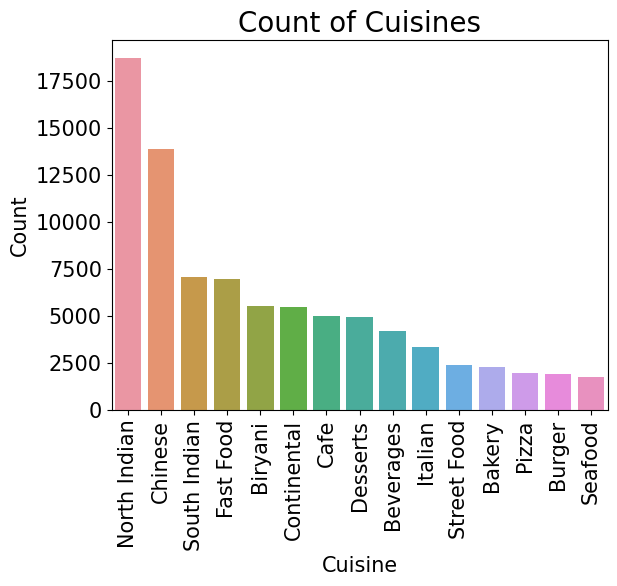

In [82]:
#fig = plt.figure(figsize = (25,8))
plt.ticklabel_format(style='plain') # to remove le6
sns.barplot(temp_series_df.Cuisine.iloc[0:15] , temp_series_df.Count.iloc[0:15])
plt.xticks(rotation = 90, size = 15)
plt.xlabel("Cuisine", size = 15)
plt.ylabel("Count", size = 15)
plt.title("Count of Cuisines", size = 20)
plt.yticks(size = 15)
plt.show()

In [83]:
file_name = 'ZomatoDf.xlsx'
df_final.to_excel(file_name)

In [84]:
temper = df_final.copy()
temper['counter'] = 0
temper.head()
temper = temper.groupby(['location','cuisines']).size().reset_index()
temper.rename(columns={0:  'count of rc'},inplace=True)
temper.sort_values(["location","count of rc"], ascending=(True,False), inplace=True)
temper 

,location,cuisines,count of rc
214,BTM,"North Indian, Chinese",363
200,BTM,North Indian,292
129,BTM,Fast Food,104
48,BTM,Biryani,88
105,BTM,"Chinese, North Indian",80
...,...,...,...
6992,Yeshwantpur,"North Indian, Chinese, South Indian, Mughlai",1
6997,Yeshwantpur,"North Indian, South Indian, Chinese",1
6998,Yeshwantpur,"North Indian, Street Food",1
7005,Yeshwantpur,Street Food,1


In [85]:
df_final['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'Biryani, Rolls, Middle Eastern, Arabian',
       'North Indian, Chinese, Biryani, Street Food',
       'North Indian, South Indian, Chinese, Desserts'], dtype=object)

In [86]:
?wordcloud

Object `wordcloud` not found.


In [87]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob, Word
from itertools import chain
from collections import Counter


replace_spaces = re.compile('[/(){}\[\]\|@,;]')
remove_special_chars = re.compile('[^0-9a-z #+_]') 

remove_ip_addr = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
def clean_steps(text):
    text = text.replace('\n', ' ').lower()#
    text = remove_ip_addr.sub('', text) 
    #text = replace_spaces.sub(' ',text) #as it is already removed in our cleaning at the top
    text = remove_special_chars.sub('',text)
    text = ' '.join([w for w in text.split() if not w in STOPWORDS]) # basically join all non stopwords with space in between
    return text


def draw_wordcloud_from_dataframe(dataframe, column, chart_format
                                 ,verbose=0):
    x = dataframe[[column]].fillna("missing")
    x = x[column].map(clean_steps)
    words_counts = Counter(chain.from_iterable(map(str.split, x)))
    vocab_size = 50000
    top_words = sorted(words_counts, key=words_counts.get, reverse=True)[:vocab_size]
    text_join = ' '.join(top_words)

    wordcloud1 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1800,
                          height=1400,
                ).generate(text_join)
    return wordcloud1


In [88]:
w1 = draw_wordcloud_from_dataframe(df_final,"cuisines","jpg")
w2 = draw_wordcloud_from_dataframe(df_final, "reviews_list", "jpg")
w3 = draw_wordcloud_from_dataframe(df_final, "name", "jpg")

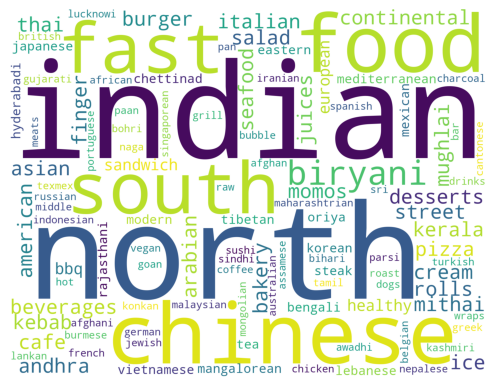

In [89]:
plt.imshow(w1) # wordcloud for cuisines
plt.axis("off")
plt.show()

In [90]:
# For some reason the words "rajeshwrites" have cluttered wordcloud that is why I need to remove them 
for i in range(len(df_final['reviews_list'])):
    if df_final['reviews_list'][i].__contains__("rajeshwrites"):
        df_final['reviews_list'][i] = df_final['reviews_list'][i].replace("rajeshwrites", "")

C:\Users\91992\AppData\Local\Temp\ipykernel_11960\715742869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['reviews_list'][i] = df_final['reviews_list'][i].replace("rajeshwrites", "")


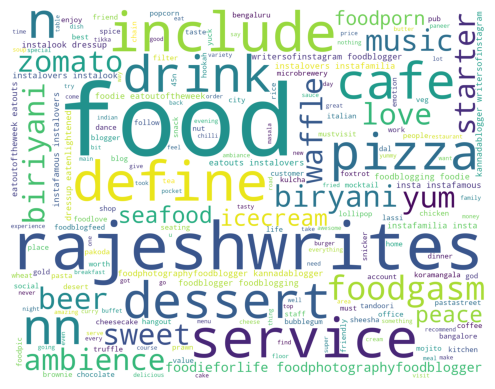

In [91]:
plt.imshow(w2) # word cloud for reviews
plt.axis("off")
plt.show()

# so what I wanted to know is what food is talked about the most. and biryani comes close with 2 variants of the word being used = "biryani" and "biriyani"


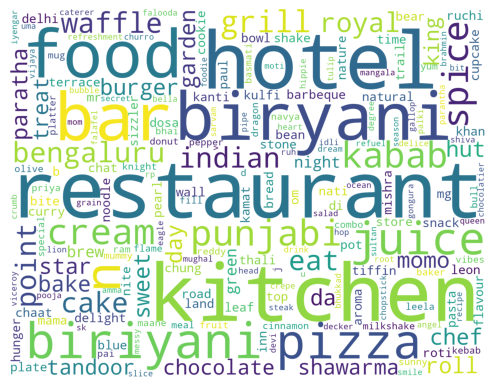

In [92]:
plt.imshow(w3) # word cloud for restaurant name
plt.axis("off")
plt.show()

In [93]:
#Reason for "n" in word cloud
sum = 0
for i in range(len(df_final['name'])):
    if df_final['name'][i].__contains__(" n "):
        print(df_final['name'][i]) 
        
# As we can see, n is actually "and" in the name of restaurants and not \n as thought before. So it is not misleading cloud but is important element

Sip n Dine
Roots n Fruits
Mist n Creams
Mist n Creams
Mak n Vak - Fyn
The Farm House Bar n Grill
Mist n Creams
The Farm House Bar n Grill
The Farm House Bar n Grill
Saara's Grill n Spice - SS Lumina Hotel
High n Hungry
Mak n Vak - Fyn
Mist n Creams
Saara's Grill n Spice - SS Lumina Hotel
Mak n Vak - Fyn
Swathi Spice n Ice
Mak n Vak - Fyn
Mist n Creams
Swathi Spice n Ice
Mak n Vak - Fyn
High n Hungry
Mist n Creams
Roots n Fruits
Mist n Creams
Mist n Creams
Saara's Grill n Spice - SS Lumina Hotel
High n Hungry
Mak n Vak - Fyn
Saara's Grill n Spice - SS Lumina Hotel
Mak n Vak - Fyn
Saara's Grill n Spice - SS Lumina Hotel
High n Hungry
Mak n Vak - Fyn
Saara's Grill n Spice - SS Lumina Hotel
Saara's Grill n Spice - SS Lumina Hotel
Mak n Vak - Fyn
High n Hungry
Saara's Grill n Spice - SS Lumina Hotel
Saara's Grill n Spice - SS Lumina Hotel
High n Hungry
Saara's Grill n Spice - SS Lumina Hotel
Mak n Vak - Fyn
Mist n Creams
The Farm House Bar n Grill
Mist n Creams
The Farm House Bar n Grill
Gr